In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 16
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [47]:
cur_dir = os.getcwd()

In [48]:
df = pd.read_csv(cur_dir + "//features_phase6a.csv")

In [49]:
df.head()

,FG1,FG2,FG3,FG4,FG5,FG6,FG7,FG8,FG9,FG10,...,NER_LOC,NER_OTH,SNER_ORG,SNER_PST,SNER_ADD,SNER_CITY,SNER_NAME,POS,SEP,LABEL
0,-1.23830,0.99487,-0.73677,1.07730,0.25410,0.081738,0.17186,0.59812,-0.43664,0.029587,...,0,2,2,0,0,0,0,1,1,Others
1,-1.44060,0.58249,-1.29030,0.64414,-0.38313,-0.413500,-1.23140,-0.34478,0.76907,-0.921770,...,0,12,5,0,0,0,0,2,1,abstract
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0,26,0,0,6,0,0,3,1,authors
3,2.02380,-0.51973,-1.12920,0.26308,0.18482,-0.051798,-0.00002,-0.15213,-1.88080,0.437770,...,2,26,15,0,5,0,0,4,1,affiliation
4,0.90512,0.13008,1.09170,0.52514,-0.21762,-0.222880,-0.69978,-0.60544,0.80407,-0.315140,...,0,6,0,0,0,0,0,5,1,correspondingauthor


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337 entries, 0 to 17336
Columns: 135 entries, FG1 to LABEL
dtypes: float64(113), int64(21), object(1)
memory usage: 17.9+ MB


In [51]:
df.shape

(17337, 135)

In [52]:
len(df['LABEL'].unique())

17

In [53]:
df['LABEL'].unique()

array(['Others', 'abstract', 'authors', 'affiliation',
       'correspondingauthor', 'dummy', 'keywordsdefault', 'articletitle',
       'abstracttitle', 'acknowledgementstitle', 'acknowledgements',
       'grant-sponsor', 'articlefootnote', 'grant-highlight',
       'nomenclature', 'listdefinition', 'grant-number'], dtype=object)

In [10]:
df.LABEL = df.LABEL.astype('category')
df.LABEL = df.LABEL.cat.codes

In [11]:
df['LABEL'].unique()

array([ 0,  1,  8,  5,  9, 10, 14,  7,  2,  4,  3, 13,  6, 11, 16, 15, 12], dtype=int64)

In [143]:
## X -> features, y -> label
X= df.loc[:,'FG1':'SEP']
y = df.loc[:,'LABEL']

In [144]:
Y_label = df['LABEL'].unique()

In [145]:
Y_label

array(['Others', 'abstract', 'authors', 'affiliation',
       'correspondingauthor', 'dummy', 'keywordsdefault', 'articletitle',
       'abstracttitle', 'acknowledgementstitle', 'acknowledgements',
       'grant-sponsor', 'articlefootnote', 'grant-highlight',
       'nomenclature', 'listdefinition', 'grant-number'], dtype=object)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)

In [147]:
def confusion_matrix_print(cm,Y_label):
    conf_arr = cm
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

            
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

    width, height = conf_arr.shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
    
    cb = fig.colorbar(res)

    plt.xticks(range(width), Y_label[:width])
    plt.yticks(range(height), Y_label[:height])
    plt.grid(False)
    plt.savefig('confusion_matrix.png', format='png')

0.528835063437


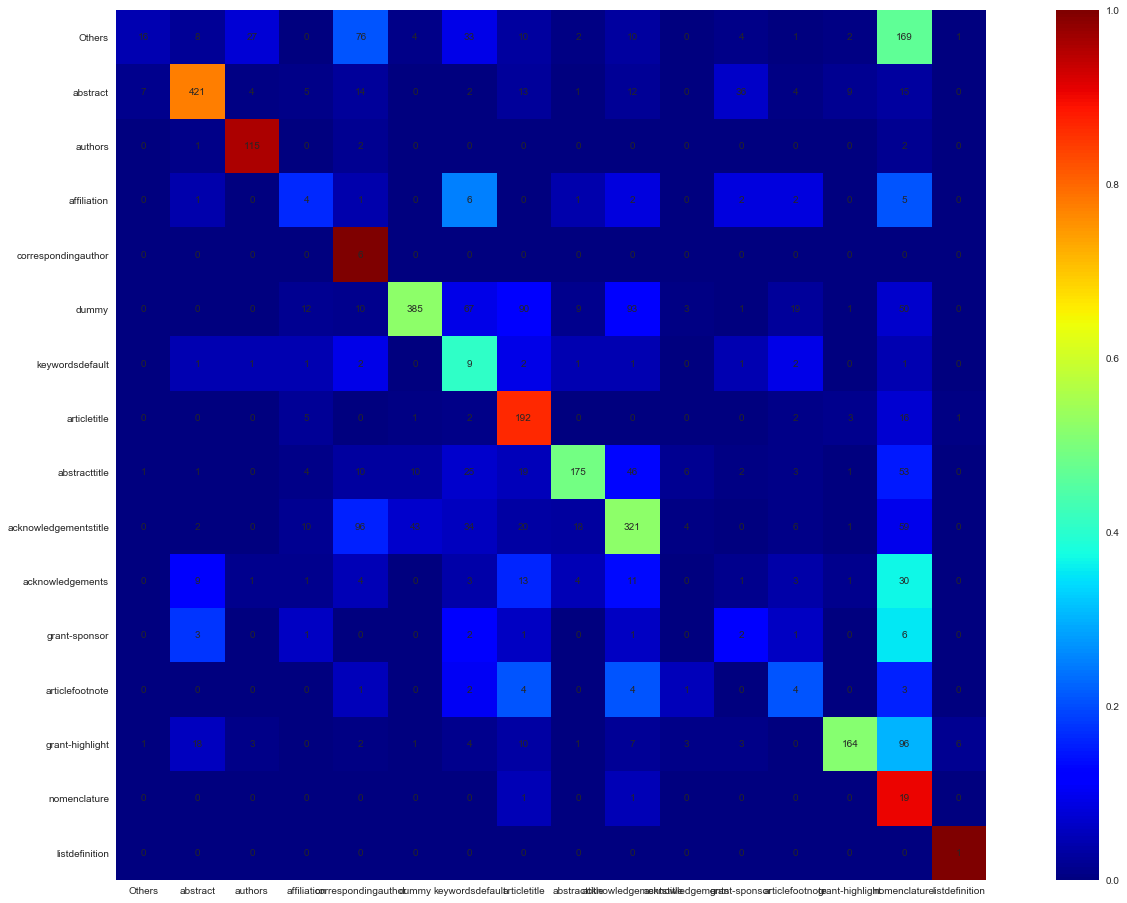

In [154]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
confusion_matrix_print(cm,Y_label)

0.808535178777


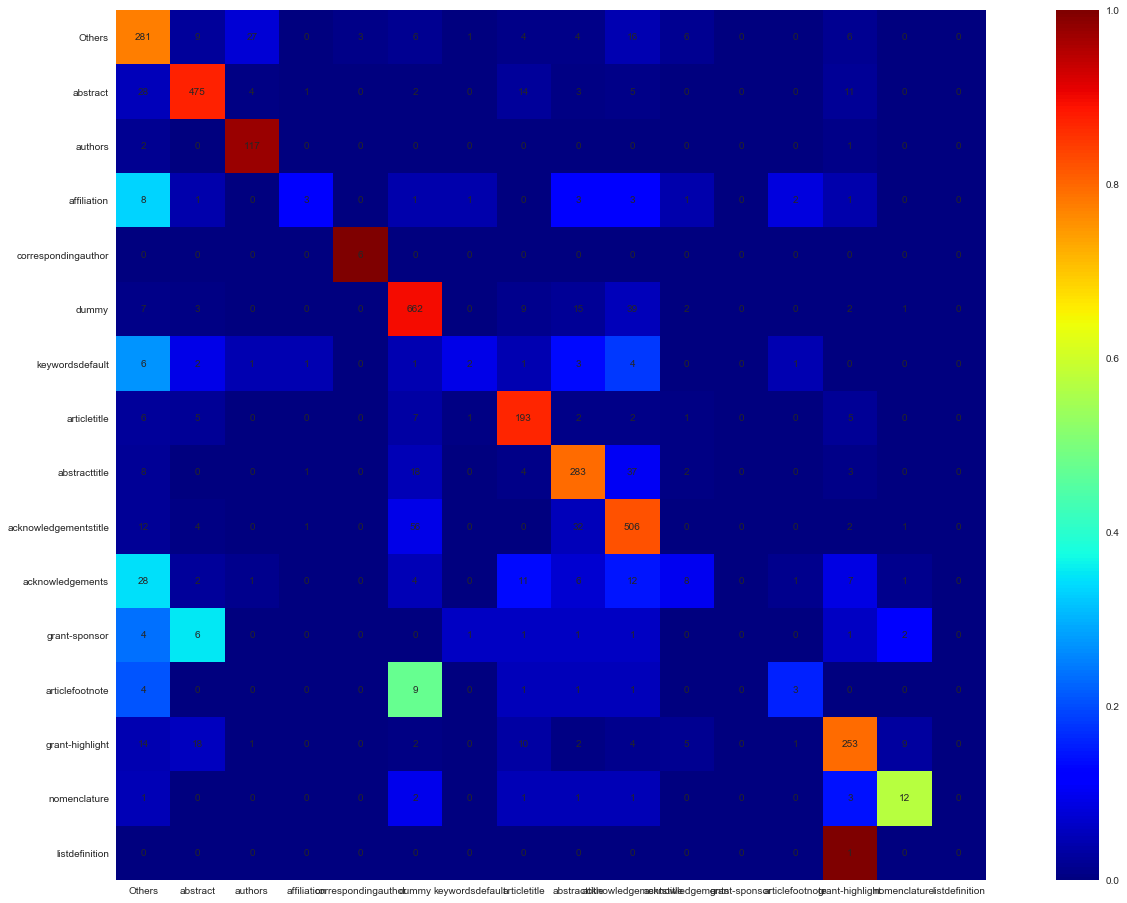

In [150]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
confusion_matrix_print(cm,Y_label)

0.788062283737


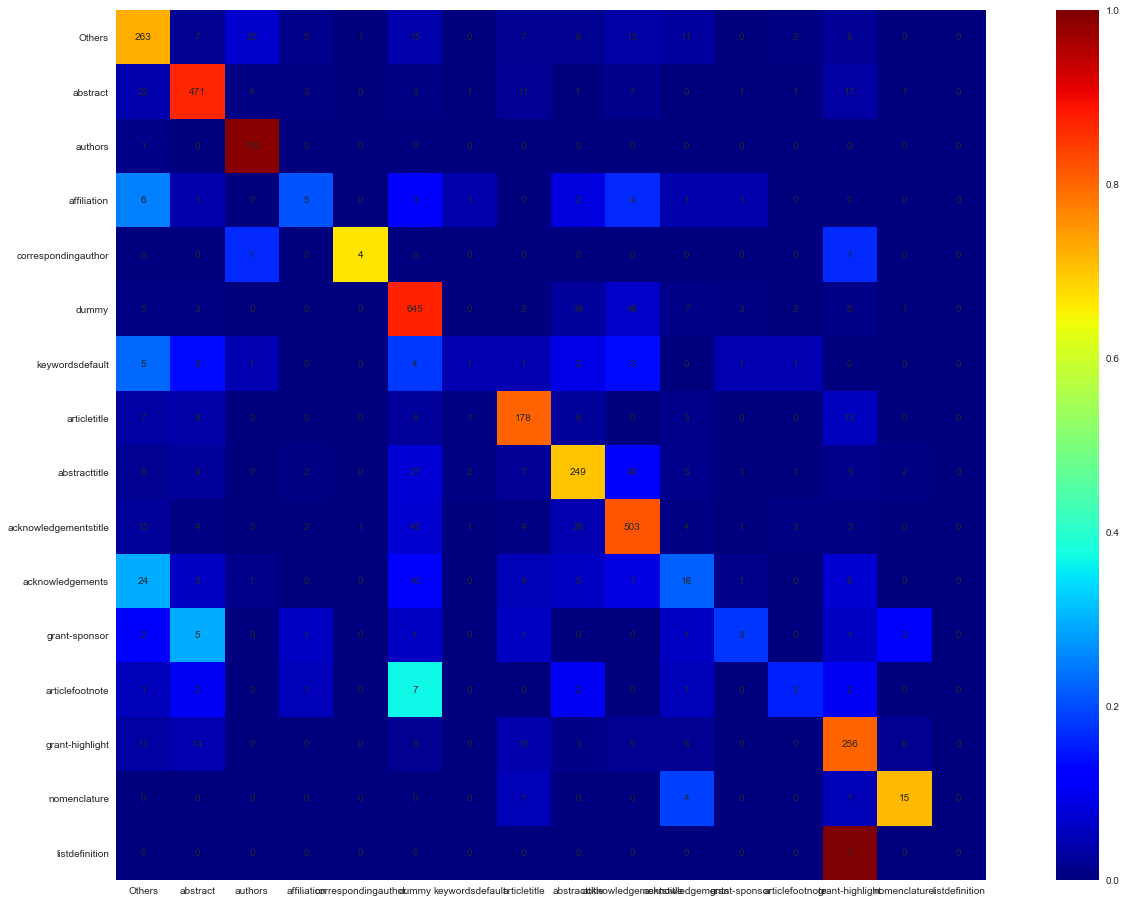

In [157]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth =15).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
# model accuracy for X_test
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, dtree_predictions)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
confusion_matrix_print(cm, Y_label)

0.772779700115


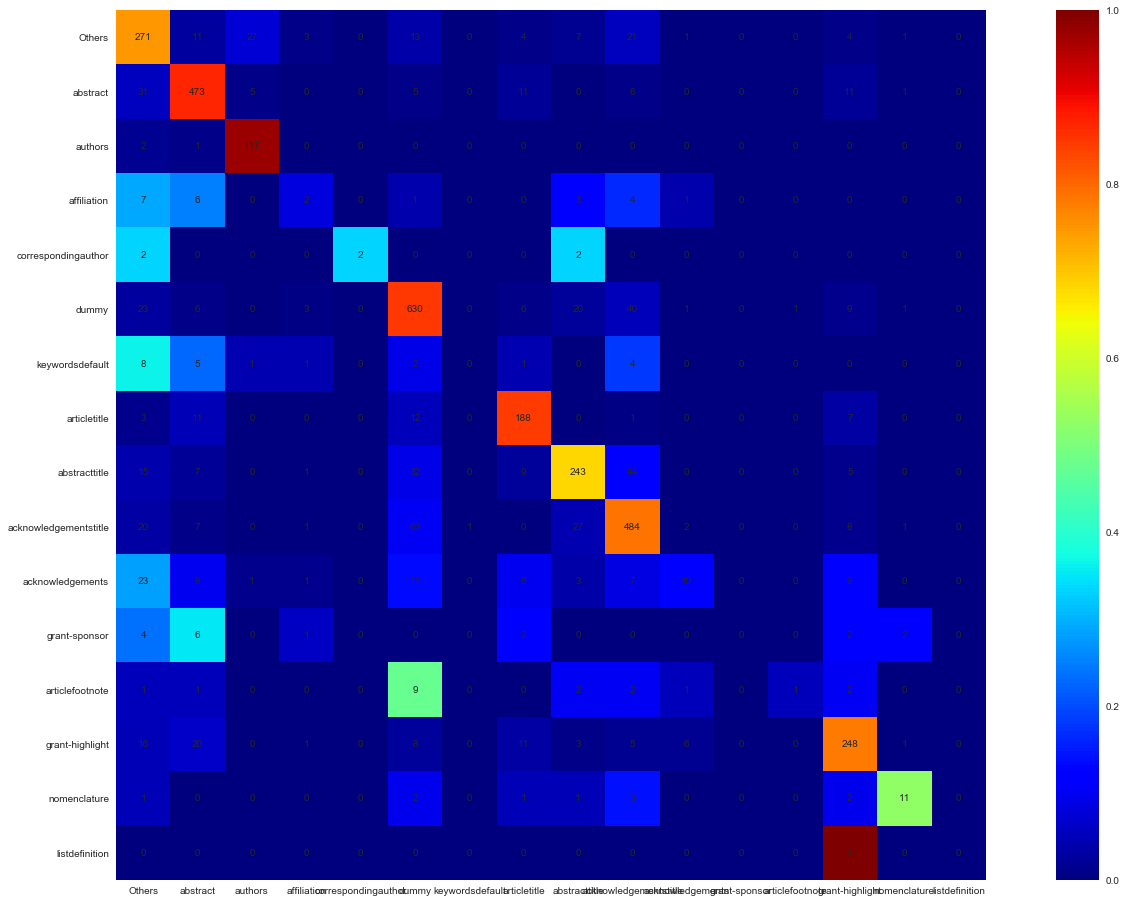

In [158]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
confusion_matrix_print(cm,Y_label)

### Remove Highly Correlated Variables

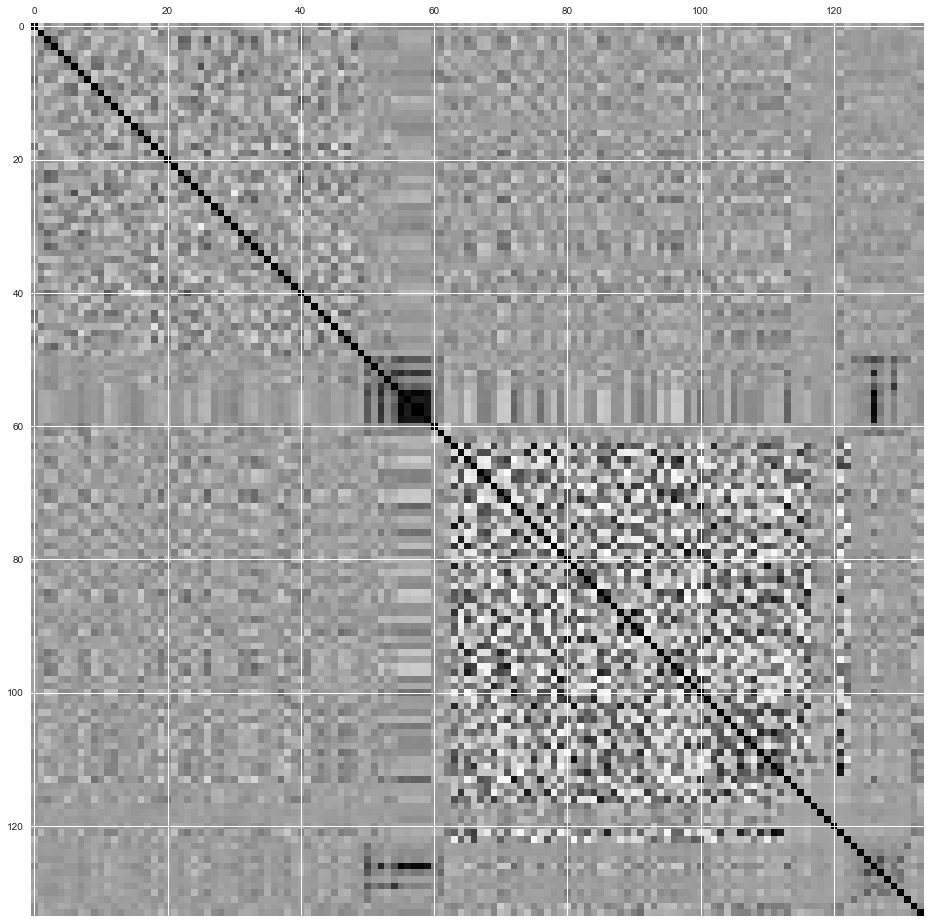

In [159]:
#check correlation
plt.matshow(df.corr())

In [160]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
print (so[134:160])

LEN       NER_OTH     0.994708
NER_OTH   LEN         0.994708
DP_POBJ   DP_PREP     0.992619
DP_PREP   DP_POBJ     0.992619
DP_POBJ   LEN         0.958093
LEN       DP_POBJ     0.958093
          DP_PREP     0.957370
DP_PREP   LEN         0.957370
C_KEYW    CG49        0.946848
CG49      C_KEYW      0.946848
CG26      CG28        0.945425
CG28      CG26        0.945425
DP_PREP   NER_OTH     0.943384
NER_OTH   DP_PREP     0.943384
DP_POBJ   NER_OTH     0.942774
NER_OTH   DP_POBJ     0.942774
CG13      C_KEYSW     0.911114
C_KEYSW   CG13        0.911114
CG13      CG19        0.909808
CG19      CG13        0.909808
CG30      CG7         0.904676
CG7       CG30        0.904676
CG24      CG17        0.892933
CG17      CG24        0.892933
LEN       DP_NSUBJ    0.892668
DP_NSUBJ  LEN         0.892668
dtype: float64


In [161]:
df2= df.drop(['DP_PREP','DP_POBJ','CG19','CG28','C_KEYW','NER_OTH'],axis=1)

In [162]:
df2.shape

(17337, 129)

In [214]:
## X -> features, y -> label
X= df2.loc[:,'FG1':'SEP']
y = df2.loc[:,'LABEL']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)

In [165]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
#confusion_matrix_print(cm, Y_label)

0.803056516724


In [218]:
X= df.loc[:,'FG1':'SEP']
y = df.loc[:,'LABEL']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)

In [169]:
from sklearn.feature_selection import RFE
estimator = SVC(kernel="linear")
selector = RFE(estimator, 100, step=1)
selector = selector.fit(X_train, y_train)
selector.predict(X_test)
acc = selector.score(X_test, y_test)
print (acc)

0.803056516724


In [220]:
#PCA
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.9999999)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [223]:
X_train.shape

(13869, 84)

In [222]:
#SCV after PCA
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
#confusion_matrix_print(cm, Y_label)

0.808823529412
